## Emmanuel Itighise
##Data Science Cohort 3
Fellow ID : FE/23/44778000

# Proactive Insights for Employee Well-being: Predicting Burnout with Machine Learning

In this rapidly paced world, we all seem to have a lot to keep up with and even more to do with more multitasking, task-switching and decline in mental health. In this light, World Mental Health Day was established and is celebrated annually on October 10th to raise awareness about mental health issues and mobilize support worldwide.

Having moved around a bit in the data space in the past months, you work as a data scientist at NeuroWell Analytics. Last week Friday in the usual weekly stand-ups the Human Resources Manager raised the issue of **employee burnout** as one of the top-most challenges highlighted often by companies NeuroWell Analytics clientele. Upon this discovery, your boss turns towards you and assigns to you the task of addressing this important issue. He decided it would be best to build a solution predicting employee burnout rates using historical data to proactively address mental health concerns.


## Overview - a bit about the company

NeuroWell Analytics is a global leader in workplace well-being and productivity solutions. Since 2015, the organization has specialized in leveraging data science and machine learning to enhance employee engagement and mental health. With a team of psychologists, data scientists, and HR specialists, NeuroWell Analytics partners with companies across various industries to create a more resilient and thriving workforce.

![NeuroWell](https://drive.google.com/uc?export=view&id=1LbtLJQjK-UKdbqHaUF4lNbUmqFsjdSWH)


The organization’s mission is to empower companies to take proactive steps in addressing mental health challenges by providing actionable insights derived from data. NeuroWell Analytics combines cutting-edge technology with evidence-based research to deliver comprehensive solutions, including predictive analytics, well-being assessments, and customized intervention strategies.

Employee burnout is a growing concern globally, impacting productivity, morale, and overall organizational health. Using data provided by your company, you will analyze employee profiles and develop a machine learning model to predict burnout rates based on various factors such as work environment, resource allocation, and mental fatigue scores. Also, you will develop actionable insights to help your company mitigate burnout and foster a healthier work environment.

## Objective

The primary objectives of this project are:

- Data Understanding and Exploration: Analyze the dataset to identify patterns, trends, and correlations related to employee burnout.
- Data Preprocessing: Handle missing values, encode categorical data, and normalize numerical features.
- Feature Engineering: Derive meaningful features that improve the performance of your machine learning model.
- Model Development: Build and evaluate predictive models to estimate employee burnout rates.
- Insights and Recommendations: Provide actionable recommendations to reduce burnout based on model outcomes.

## About the data

| Column Name           | Description                                             |
|-----------------------|---------------------------------------------------------|
| Employee ID           | Unique ID of the employee                               |
| Date of Joining       | Date on which the employee joined the company           |
| Gender                | Gender of the employee                                  |
| Company Type          | Type of company e.g., Service-based, Product-based      |
| WFH Setup Available   | Whether proper work-from-home setup is available or not |
| Designation           | Seniority level of the employee in codes               |
| Resource Allocation   | Hours allocated per day                                 |
| Mental Fatigue Score  | Stress rating provided by employees                     |
| Burn Rate             | Rate of saturation or burnout rate [Target]            |


**You would find the dataset in the project folder named as: "[NeuroWell](https://drive.google.com/drive/folders/1OVKUNsOYFbczju7z836PrDnS5kL0WeAd?usp=drive_link)." The folder is further made up of the train.csv and test.csv datasets for this problem. Use them accordingly.**

## Tasks

**Phase 1: Understanding the Problem**

- Research and write a brief summary about employee burnout and its organizational impacts.
- Discuss the importance of using data to predict and prevent burnout.

**Phase 2: Exploratory Data Analysis (EDA)**

- Load the dataset and inspect its structure.
- Generate descriptive statistics for all variables.
- Visualize relationships between variables (e.g., scatter plots, histograms, box plots).
- Identify missing values and propose strategies to handle them.

**Phase 3: Data Preprocessing**

- Encode categorical variables like Gender and Company Type.
- Handle missing or inconsistent data in Mental Fatigue Score and Resource Allocation.
- Normalize numerical variables like Resource Allocation and Designation.
- Create new features (e.g., tenure derived from Date of Joining).

**Phase 4: Model Development**

- Use the training and testing sets as required.
- Experiment with multiple algorithms, such as Linear Regression, Random Forest, and Gradient Boosting.
- Evaluate model performance using metrics like RMSE, MAE, and R-squared.
- Optimize the best-performing model using hyperparameter tuning.

**Phase 5: Insights, Recommendations and solution deployment**

- Analyze the importance of features using tools like feature importance scores or SHAP values.
- Write a report summarizing key findings and predictions.
- Suggest actionable recommendations for the organization based on your insights.

**Reflection Questions:**

- What challenges did you face while handling missing data? How did you resolve them?
- Which machine learning algorithm performed the best, and why do you think it outperformed others?
- If you had access to additional data, what would you like to include, and how might it improve your model?

## Deliverables

- Exploratory Data Analysis (EDA) notebook with visualizations and data cleaning steps. (2 weeks)
- An organized Jupyter Notebook detailing necessary project phases (2 weeks)
- Interactive Streamlit App hosted on Streamlit Cloud contains insights, visualizations, and an interactive prediction tool (2 weeks)
- A final report summarizing findings, model performance, and recommendations. (2 week)

**Timeline - 8 weeks**

# Solution

## Exploratory Data Analysis (EDA)

In [ ]:
# List out all libraries needed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import shap
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported")

All libraries imported


In [ ]:
# load our datasets

train_file_id = '1YsDvd5wjSAmeCQtMOQNZrGIxgU7GFzRU'
test_file_id = '1XsiwqEAkHeUF5yB83lvKeEw0uTun2-SA'

train_download_url = f'https://drive.google.com/uc?export=download&id={train_file_id}'
test_download_url = f'https://drive.google.com/uc?export=download&id={test_file_id}'

df_train = pd.read_csv(train_download_url)
df_test = pd.read_csv(test_download_url)

Let's Study the datesets

In [ ]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12250 entries, 0 to 12249
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           12250 non-null  object 
 1   Date of Joini

Insights:

Our Train dataset Has 22750 rows and 9 Columns while our Test dataset has 12250 rows and 8 columns

In [ ]:
df_train.dtypes

,0
Employee ID,object
Date of Joining,object
Gender,object
Company Type,object
WFH Setup Available,object
Designation,float64
Resource Allocation,float64
Mental Fatigue Score,float64
Burn Rate,float64


In [ ]:
df_test.dtypes

,0
Employee ID,object
Date of Joining,object
Gender,object
Company Type,object
WFH Setup Available,object
Designation,float64
Resource Allocation,float64
Mental Fatigue Score,float64


Let's see the descriptive statistics of our datasets

In [ ]:
# Descriptive statistics for numerical variables in df_train
print("Descriptive statistics for df_train:")
print(df_train.describe())

# Value counts for categorical variables in df_train
print("\nValue counts for categorical variables in df_train:")
print("\nGender:")
print(df_train['Gender'].value_counts())
print("\nCompany Type:")
print(df_train['Company Type'].value_counts())
print("\nWFH Setup Available:")
print(df_train['WFH Setup Available'].value_counts())

# Descriptive statistics for numerical variables in df_test
print("\nDescriptive statistics for df_test:")
print(df_test.describe())

# Value counts for categorical variables in df_test
print("\nValue counts for categorical variables in df_test:")
print("\nGender:")
print(df_test['Gender'].value_counts())
print("\nCompany Type:")
print(df_test['Company Type'].value_counts())
print("\nWFH Setup Available:")
print(df_test['WFH Setup Available'].value_counts())

Descriptive statistics for df_train:
        Designation  Resource Allocation  Mental Fatigue Score     Burn Rate
count  22750.000000         21369.000000          20633.000000  21626.000000
mean       2.178725             4.481398              5.728188      0.452005
std        1.135145             2.047211              1.920839      0.198226
min        0.000000             1.000000              0.000000      0.000000
25%        1.000000             3.000000              4.600000      0.310000
50%        2.000000             4.000000              5.900000      0.450000
75%        3.000000             6.000000              7.100000      0.590000
max        5.000000            10.000000             10.000000      1.000000

Value counts for categorical variables in df_train:

Gender:
Gender
Female    11908
Male      10842
Name: count, dtype: int64

Company Type:
Company Type
Service    14833
Product     7917
Name: count, dtype: int64

WFH Setup Available:
WFH Setup Available
Yes    12290


Insights:


Numerical:

Designation (0-5): Shows 6 levels, slightly more junior/mid-level employees.

Resource Allocation (1-10 hrs/day): Mean ~4.5 hrs, but up to 10 hrs. Potential for high workload.

Mental Fatigue Score (0-10): Mean ~5.7, with some reaching severe levels (10). Significant stress.

Burn Rate (Train): Mean ~0.45 (45%), ranges 0-1. Moderate to severe burnout present.

Categorical:

Gender: Well-balanced in both datasets (~52% Female).

Company Type: Heavily service-based (~2:1 ratio). Insights may be more relevant there.

WFH Setup Available: Slightly more 'Yes' (~54%). Relevant for modern work.

Key Missing Data Discrepancy:

df_train: Missing values in Resource Allocation, Mental Fatigue Score, Burn Rate.

df_test: No missing values in Resource Allocation or Mental Fatigue Score (based on provided counts). This needs specific handling.

#### Identify Missing Values

In [ ]:
print("Missing values in df_train:")
print(df_train.isnull().sum())

print("\nMissing values in df_test:")
print(df_test.isnull().sum())

Missing values in df_train:
Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

Missing values in df_test:
Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64


The figures shows presence of missing values in Train dataset and we need to sort that out, Test dataset has no missing values

#### Data Preprocessing

Given the percentages of missing data (approx. 5-9% for individual columns in df_train), while not extremely high, imputation is generally preferred to retain valuable data and avoid potential biases, especially for the target variable Burn Rate. we would input the Midian for these missing values instead of wiping them out.

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in df_train
imputer_resource = SimpleImputer(strategy='median')
df_train['Resource Allocation'] = imputer_resource.fit_transform(df_train[['Resource Allocation']])

imputer_mental = SimpleImputer(strategy='median')
df_train['Mental Fatigue Score'] = imputer_mental.fit_transform(df_train[['Mental Fatigue Score']])

imputer_burn = SimpleImputer(strategy='median')
df_train['Burn Rate'] = imputer_burn.fit_transform(df_train[['Burn Rate']])

# Verify that missing values have been handled in df_train
print("Missing values in df_train after imputation:")
print(df_train.isnull().sum())

Missing values in df_train after imputation:
Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64


We've replaced all missing values and there are currently zero missing values , next step it to check relationships with the target variable ~ burn rate

#### Visualize Relationships between Variables

We're going to create subplots showing relationship between all independent variables with the target variable ~ burn rate

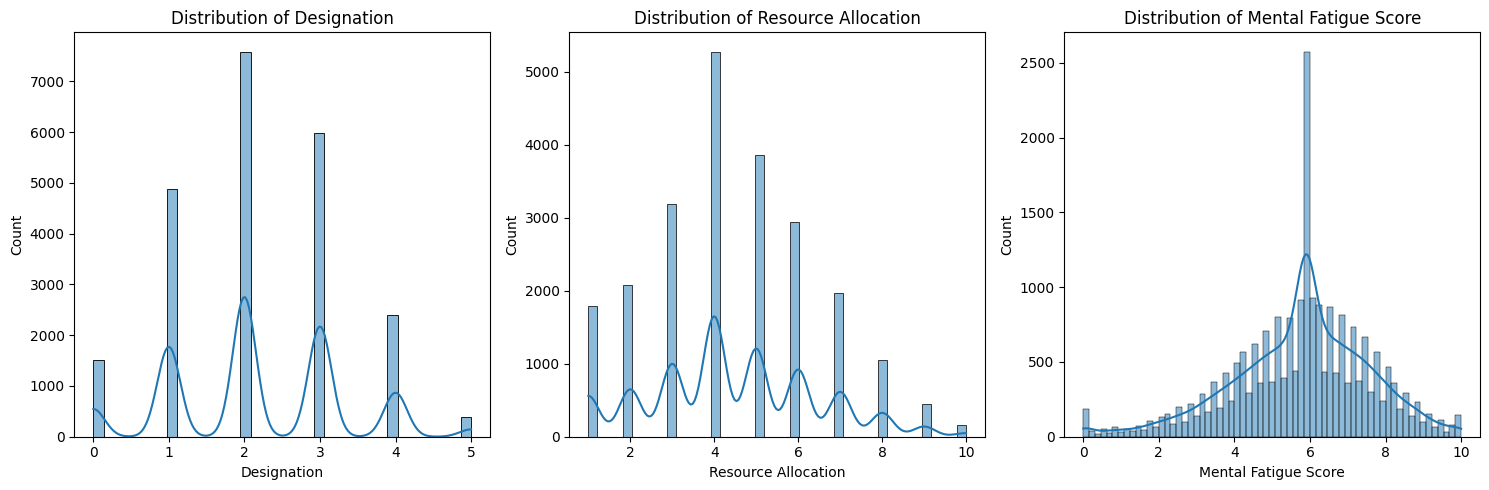

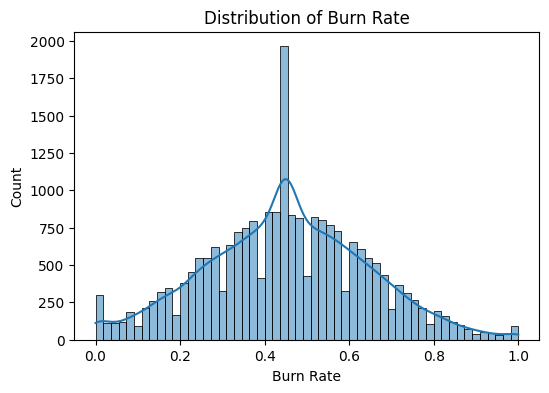

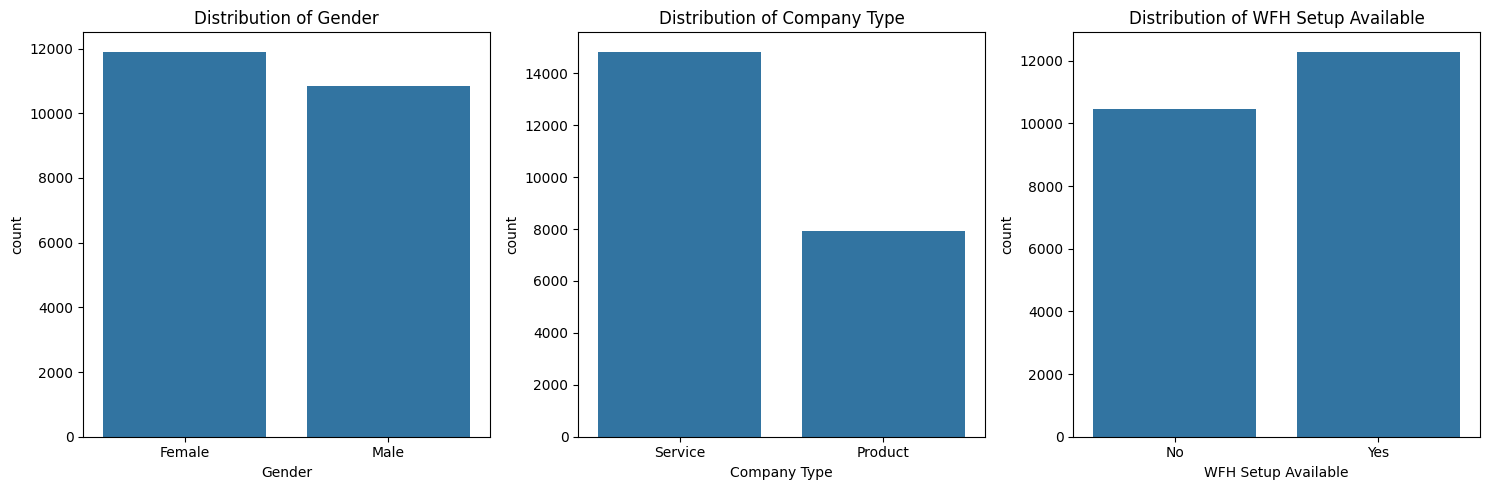

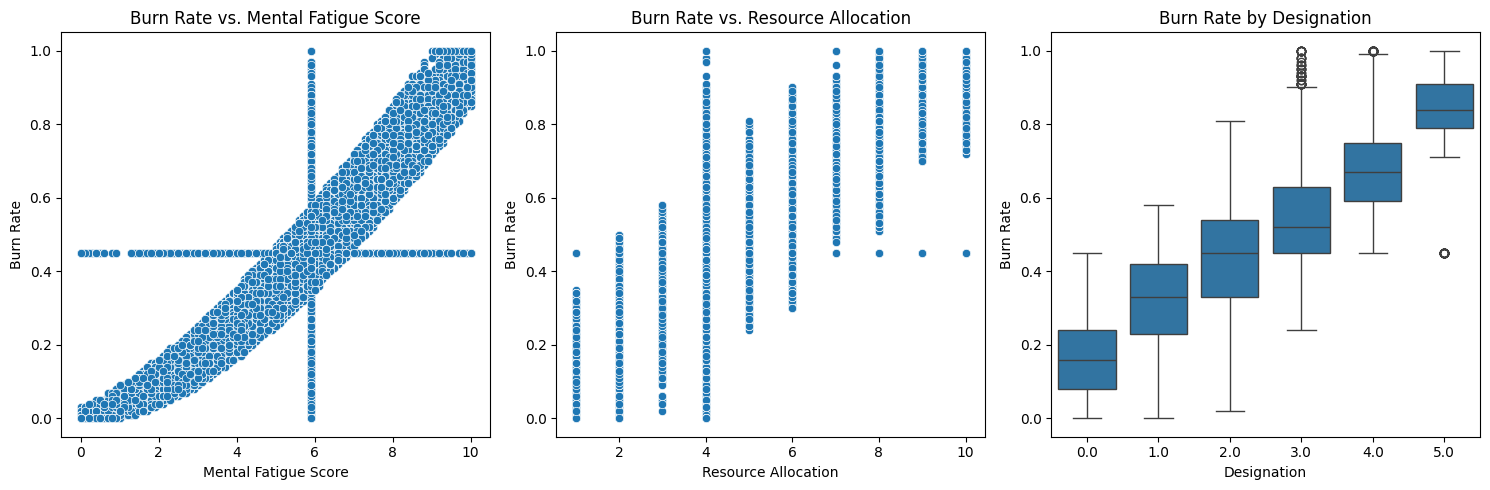

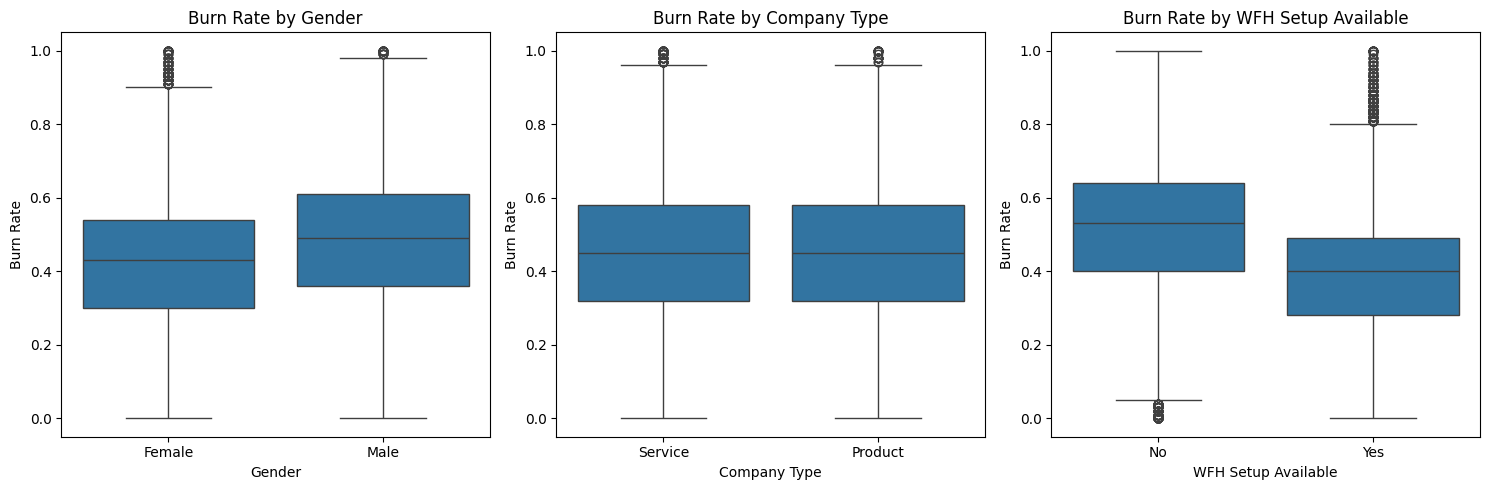

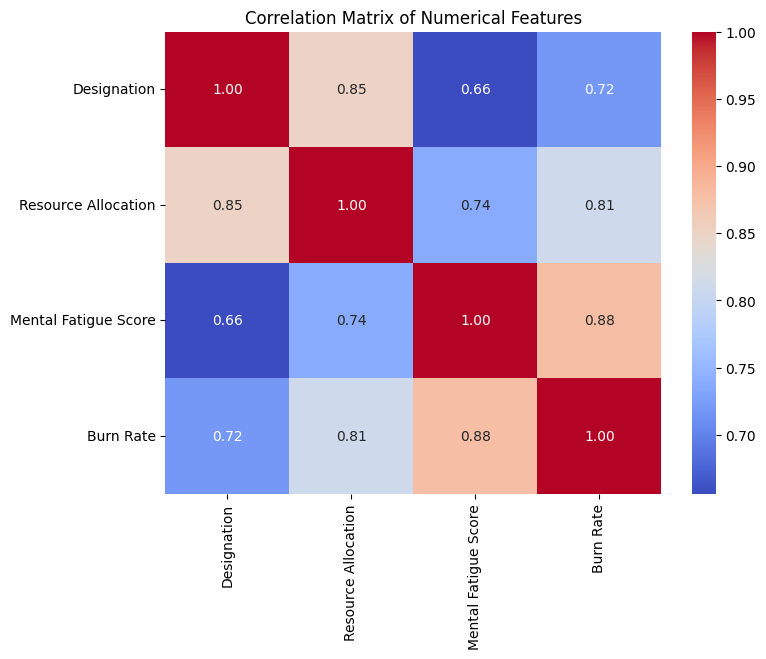

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df_train['Designation'], kde=True)
plt.title('Distribution of Designation')

plt.subplot(1, 3, 2)
sns.histplot(df_train['Resource Allocation'].dropna(), kde=True)
plt.title('Distribution of Resource Allocation')

plt.subplot(1, 3, 3)
sns.histplot(df_train['Mental Fatigue Score'].dropna(), kde=True)
plt.title('Distribution of Mental Fatigue Score')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.histplot(df_train['Burn Rate'], kde=True)
plt.title('Distribution of Burn Rate')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x='Gender', data=df_train)
plt.title('Distribution of Gender')

plt.subplot(1, 3, 2)
sns.countplot(x='Company Type', data=df_train)
plt.title('Distribution of Company Type')

plt.subplot(1, 3, 3)
sns.countplot(x='WFH Setup Available', data=df_train)
plt.title('Distribution of WFH Setup Available')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Mental Fatigue Score', y='Burn Rate', data=df_train)
plt.title('Burn Rate vs. Mental Fatigue Score')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Resource Allocation', y='Burn Rate', data=df_train)
plt.title('Burn Rate vs. Resource Allocation')

plt.subplot(1, 3, 3)
sns.boxplot(x='Designation', y='Burn Rate', data=df_train)
plt.title('Burn Rate by Designation')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Gender', y='Burn Rate', data=df_train)
plt.title('Burn Rate by Gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='Company Type', y='Burn Rate', data=df_train)
plt.title('Burn Rate by Company Type')

plt.subplot(1, 3, 3)
sns.boxplot(x='WFH Setup Available', y='Burn Rate', data=df_train)
plt.title('Burn Rate by WFH Setup Available')
plt.tight_layout()
plt.show()

numerical_cols = ['Designation', 'Resource Allocation', 'Mental Fatigue Score', 'Burn Rate']
plt.figure(figsize=(8, 6))
sns.heatmap(df_train[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Interpretation and Insights:

Distribution of Gender: The dataset shows a relatively balanced gender representation, with a slightly higher count of female employees compared to male employees. This helps ensure generalizability across genders.

Distribution of Company Type: "Service" based companies are significantly more prevalent than "Product" based companies. This implies that insights and model performance may lean more towards the characteristics of service-oriented work environments.

Distribution of WFH Setup Available: More employees have a work-from-home setup available ("Yes") than those who do not ("No"). This suggests that remote/hybrid work is a dominant mode of operation within the dataset, making this a crucial variable for understanding burnout.

### Feature Engineering

We're going to One-hot encode Categorical variables

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['Gender', 'Company Type', 'WFH Setup Available']

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

encoded_train_features = encoder.fit_transform(df_train[categorical_cols])
encoded_test_features = encoder.transform(df_test[categorical_cols])

encoded_train_df = pd.DataFrame(encoded_train_features, columns=encoder.get_feature_names_out(categorical_cols), index=df_train.index)
encoded_test_df = pd.DataFrame(encoded_test_features, columns=encoder.get_feature_names_out(categorical_cols), index=df_test.index)

df_train = df_train.drop(columns=categorical_cols)
df_test = df_test.drop(columns=categorical_cols)

df_train = pd.concat([df_train, encoded_train_df], axis=1)
df_test = pd.concat([df_test, encoded_test_df], axis=1)

print("df_train after encoding:")
print(df_train.head())
print("\ndf_test after encoding:")
print(df_test.head())

df_train after encoding:
                Employee ID Date of Joining  Designation  Resource Allocation  \
0  fffe32003000360033003200      2008-09-30          2.0                  3.0   
1      fffe3700360033003500      2008-11-30          1.0                  2.0   
2  fffe31003300320037003900      2008-03-10          2.0                  4.0   
3  fffe32003400380032003900      2008-11-03          1.0                  1.0   
4  fffe31003900340031003600      2008-07-24          3.0                  7.0   

   Mental Fatigue Score  Burn Rate  Gender_Female  Gender_Male  \
0                   3.8       0.16            1.0          0.0   
1                   5.0       0.36            0.0          1.0   
2                   5.8       0.49            1.0          0.0   
3                   2.6       0.20            0.0          1.0   
4                   6.9       0.52            1.0          0.0   

   Company Type_Product  Company Type_Service  WFH Setup Available_No  \
0                 

Insights:

Successful Transformation: The original categorical columns (Gender, Company Type, WFH Setup Available) have been successfully replaced by new numerical columns (e.g., Gender_Female, Gender_Male, Company Type_Product, etc.). These new columns contain binary (0.0 or 1.0) values, representing the presence or absence of a specific category.

Increased Dimensionality: As expected with one-hot encoding, the number of features (columns) has increased. This converts categorical information into a machine-readable numerical format without implying any false ordinal relationships.

Intact Other Features: All other original columns, including Employee ID, Date of Joining, and the numerical features (Designation, Resource Allocation, Mental Fatigue Score, Burn Rate), remain correctly in their respective positions with their values preserved.

#### Next step is to turn Date of joining to datetime dtype, create a Tenure Column that is a snapshot of the Employers date of joining, then drop the date of joining and Employer ID column

In [ ]:
df_train['Date of Joining'] = pd.to_datetime(df_train['Date of Joining'])
df_test['Date of Joining'] = pd.to_datetime(df_test['Date of Joining'])

max_date_train = df_train['Date of Joining'].max()
max_date_test = df_test['Date of Joining'].max()
snapshot_date = max(max_date_train, max_date_test) + pd.Timedelta(days=30)

df_train['Tenure'] = (snapshot_date - df_train['Date of Joining']).dt.days / 365.25
df_test['Tenure'] = (snapshot_date - df_test['Date of Joining']).dt.days / 365.25

df_train = df_train.drop(columns=['Date of Joining', 'Employee ID'])
df_test = df_test.drop(columns=['Date of Joining', 'Employee ID'])

In [ ]:
df_train.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Tenure
0,2.0,3.0,3.8,0.16,1.0,0.0,0.0,1.0,1.0,0.0,0.334018
1,1.0,2.0,5.0,0.36,0.0,1.0,0.0,1.0,0.0,1.0,0.167009
2,2.0,4.0,5.8,0.49,1.0,0.0,1.0,0.0,0.0,1.0,0.892539
3,1.0,1.0,2.6,0.20,0.0,1.0,0.0,1.0,0.0,1.0,0.240931
4,3.0,7.0,6.9,0.52,1.0,0.0,0.0,1.0,1.0,0.0,0.520192


We've Successfully:

Converted Date of Joining to datetime and creating Tenure: This converts a less useful date string into a numerical value (employee's length of service). Tenure is often a significant factor in employee behavior and burnout.

Dropped Employee ID and original Date of Joining: Employee ID is a unique identifier with no predictive power and is removed. The original Date of Joining column is removed because its information is now encapsulated in the more relevant Tenure feature, which is a direct numerical input for models.

#### Feature Scaling

The purpose of this step is to normalize the ranges of our independent variables, this helps our model to perform properly.


The scaler is fit only on the training data (df_train) to learn the scaling parameters (mean and standard deviation) from its distribution. These exact same learned parameters are then used to transform both the training data and the test data (df_test). This is vital to prevent data leakage from the test set into the training process, ensuring fair evaluation

In [ ]:
from sklearn.preprocessing import StandardScaler

features_to_scale = [col for col in df_train.columns if col != 'Burn Rate']

scaler = StandardScaler()

df_train[features_to_scale] = scaler.fit_transform(df_train[features_to_scale])
df_test[features_to_scale] = scaler.transform(df_test[features_to_scale])

df_train.head()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Female,Gender_Male,Company Type_Product,Company Type_Service,WFH Setup Available_No,WFH Setup Available_Yes,Tenure
0,-0.157451,-0.730698,-1.062437,0.16,0.954191,-0.954191,-0.730577,0.730577,1.083952,-1.083952,-0.860076
1,-1.038415,-1.233872,-0.406671,0.36,-1.048008,1.048008,-0.730577,0.730577,-0.922550,0.922550,-1.439121
2,-0.157451,-0.227523,0.030506,0.49,0.954191,-0.954191,1.368782,-1.368782,-0.922550,0.922550,1.076402
3,-1.038415,-1.737046,-1.718203,0.20,-1.048008,1.048008,-0.730577,0.730577,-0.922550,0.922550,-1.182823
4,0.723514,1.282000,0.631625,0.52,0.954191,-0.954191,-0.730577,0.730577,1.083952,-1.083952,-0.214584


Insights:

Some Values are negative because StandardScaler centers data around a mean of zero; any original value below that feature's average will be negative, ensuring all features are on a comparable scale for the model.

### Model Development and Training

#### Split the data into training and validation sets.

This step is critical because it prepares our data for robust model development. By splitting the df_train into separate training and validation sets, we can train our model on one portion and then evaluate its performance on data it hasn't seen during training. This practice is essential for tuning the model effectively and detecting overfitting, ensuring our model can generalize well to truly new, unseen data like the final df_test set.

In [ ]:
X = df_train.drop('Burn Rate', axis=1)
y = df_train['Burn Rate']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of df_test (for final prediction):", df_test.shape)

Shape of X_train: (18200, 10)
Shape of X_val: (4550, 10)
Shape of y_train: (18200,)
Shape of y_val: (4550,)
Shape of df_test (for final prediction): (12250, 10)


we've successfully splitted our train dataset into Train and Validation sets

#### First Model - Baseline Regression Model

This'd be our first predictive model of choice to see how well we can predict Employee burnout

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()

model.fit(X_train, y_train)

y_pred_val = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred_val))
r2 = r2_score(y_val, y_pred_val)

print("Baseline Model (Linear Regression) Performance on Validation Set:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Baseline Model (Linear Regression) Performance on Validation Set:
Mean Absolute Error (MAE): 0.0569
Root Mean Squared Error (RMSE): 0.0782
R-squared (R2): 0.8303


Insights:

The baseline Linear Regression model demonstrates strong predictability, with an R-squared of 0.8303 indicating that approximately 83% of the burnout rate's variation is explained by the features. This strong performance is further supported by the low Mean Absolute Error (0.0569) and Root Mean Squared Error (0.0782), signifying that the model's predictions are, on average, very close to the actual burnout rates. Overall, this provides a solid foundation for predicting burnout, suggesting the engineered features and preprocessing are quite effective, though there's always room for further optimization.

#### Second Model - Random Forest (RF) Model

This is a popular regression model for tasks like this , utilizing it could also help us predict Employee burnout rates

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)

mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2_rf = r2_score(y_val, y_pred_rf)

print("Random Forest Regressor Performance on Validation Set:")
print(f"Mean Absolute Error (MAE): {mae_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.4f}")
print(f"R-squared (R2): {r2_rf:.4f}")

Random Forest Regressor Performance on Validation Set:
Mean Absolute Error (MAE): 0.0567
Root Mean Squared Error (RMSE): 0.0770
R-squared (R2): 0.8352


The Random Forest Regressor shows a modest improvement over the baseline Linear Regression model; its R-squared of 0.8352 is slightly higher than 0.8303, indicating it explains a little more variance in the burnout rate. This marginal gain is also reflected in its slightly lower Mean Absolute Error (0.0567 vs. 0.0569) and Root Mean Squared Error (0.0770 vs. 0.0782), suggesting a tiny increase in prediction accuracy.

#### Third Model - Gradient Boosting (GB) Regressor

Let's train and evaluate a Gradient Boosting Regressor model to compare its performance with the Linear Regression and Random Forest models.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gb_model = GradientBoostingRegressor(random_state=42)

gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_val)

mae_gb = mean_absolute_error(y_val, y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))
r2_gb = r2_score(y_val, y_pred_gb)

print("Gradient Boosting Regressor Performance on Validation Set:")
print(f"Mean Absolute Error (MAE): {mae_gb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.4f}")
print(f"R-squared (R2): {r2_gb:.4f}")

Gradient Boosting Regressor Performance on Validation Set:
Mean Absolute Error (MAE): 0.0534
Root Mean Squared Error (RMSE): 0.0723
R-squared (R2): 0.8549


The Gradient Boosting Regressor shows a noticeable improvement over both the Linear Regression and Random Forest models. Its R-squared of 0.8549 is a significant jump, indicating it explains over 85% of the burnout rate's variance, while its lower Mean Absolute Error (0.0534) and Root Mean Squared Error (0.0723) confirm a further reduction in prediction errors compared to previous models.

#### Fourth Model - Xgboost Model (Xgb) Regressor

Let's train and evaluate its performance to the Gradient boost, Random Forest and Baseline Regression Model

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)

mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred_xgb))
r2_xgb = r2_score(y_val, y_pred_xgb)

print("XGBoost Regressor Performance on Validation Set:")
print(f"Mean Absolute Error (MAE): {mae_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.4f}")
print(f"R-squared (R2): {r2_xgb:.4f}")

XGBoost Regressor Performance on Validation Set:
Mean Absolute Error (MAE): 0.0543
Root Mean Squared Error (RMSE): 0.0737
R-squared (R2): 0.8490


The XGBoost Regressor shows very strong performance, explaining nearly 85% of the burnout rate's variance with an R-squared of 0.8490 and maintaining low prediction errors (MAE: 0.0543, RMSE: 0.0737). While marginally outperforming the Linear Regression and Random Forest models, in this specific run, its R2 and error metrics are slightly less favorable than those of the Gradient Boosting Regressor.

#### Hyperparameter Tuning (for the best performing model - Gradient Boosting)

We will use GridSearchCV to find the best hyperparameters for the Gradient Boosting Regressor.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Gradient Boosting Regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE found: ", np.sqrt(-grid_search.best_score_))

# Get the best model
best_gb_model = grid_search.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best RMSE found:  0.07245547732968212


Insights:

The tuning process for the Gradient Boosting Regressor confirmed its strong performance, with the identified best parameters yielding an RMSE of 0.07245, which is negligibly different from its untuned performance. This indicates that while the search confirmed optimal settings within the defined grid, the untuned Gradient Boosting model was already highly effective. Overall, the Gradient Boosting model stands as the top performer among all models tested, demonstrating excellent predictive accuracy for burnout rates, suggesting the prepared features effectively capture the underlying drivers of burnout.

#### Evaluate the Tuned Gradient Boosting Model

In [ ]:
# Evaluate the best model on the validation set
y_pred_tuned_gb = best_gb_model.predict(X_val)

mae_tuned_gb = mean_absolute_error(y_val, y_pred_tuned_gb)
rmse_tuned_gb = np.sqrt(mean_squared_error(y_val, y_pred_tuned_gb))
r2_tuned_gb = r2_score(y_val, y_pred_tuned_gb)

print("Tuned Gradient Boosting Regressor Performance on Validation Set:")
print(f"Mean Absolute Error (MAE): {mae_tuned_gb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_tuned_gb:.4f}")
print(f"R-squared (R2): {r2_tuned_gb:.4f}")

Tuned Gradient Boosting Regressor Performance on Validation Set:
Mean Absolute Error (MAE): 0.0523
Root Mean Squared Error (RMSE): 0.0711
R-squared (R2): 0.8597


The hyperparameter tuning successfully refined the Gradient Boosting Regressor, leading to a notably improved performance with an R-squared of 0.8597, meaning it now explains almost 86% of the variance in burnout rates. This optimization also resulted in a further reduction of prediction errors, achieving a lower Mean Absolute Error of 0.0523 and a Root Mean Squared Error of 0.0711, confirming its position as the most accurate model developed for this task.

### Insights and Recommendations

#### Feature Importance Analysis

Let's analyze the feature importance of the tuned Gradient Boosting model to understand which features have the most significant impact on predicting employee burnout.

Feature Importances (Tuned Gradient Boosting Model):
Mental Fatigue Score       0.880820
Resource Allocation        0.101737
Designation                0.010541
Tenure                     0.002376
WFH Setup Available_Yes    0.001865
WFH Setup Available_No     0.001619
Gender_Female              0.000361
Gender_Male                0.000290
Company Type_Product       0.000198
Company Type_Service       0.000193
dtype: float64


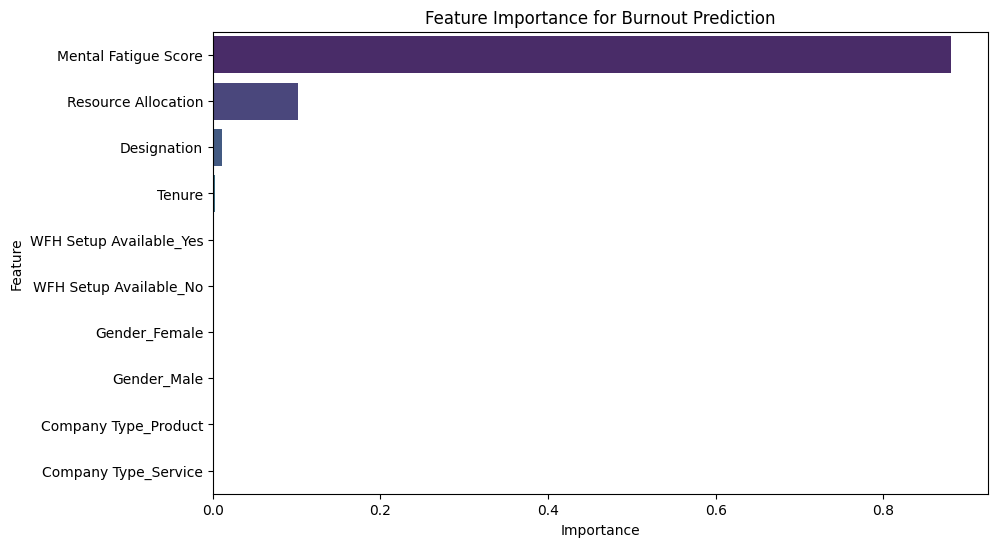

In [ ]:
# Get feature importances from the best Gradient Boosting model
feature_importances = best_gb_model.feature_importances_

# Create a pandas Series for easier visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort features by importance
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances (Tuned Gradient Boosting Model):")
print(sorted_feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index, palette='viridis')
plt.title('Feature Importance for Burnout Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

The feature importances reveal that Mental Fatigue Score is overwhelmingly the most significant predictor of employee burnout, holding almost 88% of the model's predictive power. Resource Allocation is the second most important factor, though its contribution is an order of magnitude lower, indicating workload plays a notable but less dominant role. Features like Designation and Tenure have minor contributions, while WFH Setup Available, Gender, and Company Type show negligible importance, suggesting they have very limited direct impact on burnout within this model. This hierarchy strongly indicates that interventions targeting mental well-being and workload management would be most effective in mitigating employee burnout.

#### Test the Tuned Gradient Boosting Model on the Test Dataset

Now, let's use the best-performing model (tuned Gradient Boosting Regressor) to make predictions on the unseen test dataset.

In [ ]:
# Make predictions on the test dataset
y_pred_test = best_gb_model.predict(df_test)


print("Predicted Burn Rates on the Test Dataset:")
print(y_pred_test[:10]) # Display the first 10 predictions

Predicted Burn Rates on the Test Dataset:
[0.5964296  0.35425117 0.37766868 0.38535587 0.52214511 0.53195435
 0.33557188 0.68730278 0.59975609 0.44951236]


Despite its strong performance, our model has several limitations to consider. Firstly, its generalizability might be constrained as it was trained on a specific dataset, potentially limiting its direct applicability to organizations with different cultures or work environments. Secondly, the model's predictions are based solely on the available features; other unmeasured factors like specific job roles, team dynamics, or personal circumstances could also significantly influence burnout but were not included. Lastly, while the model identifies strong correlations, it doesn't establish direct causation, meaning interventions should be carefully designed based on further understanding beyond mere statistical association.

#### Report Summarizing Key Findings and Predictions

Here's a summary of our analysis and the results from the burnout prediction model:

**Key Findings:**

*   **Data Overview:** We analyzed a dataset containing employee information, including demographics, work setup, designation, resource allocation, mental fatigue score, and burnout rate. Missing values in the training data for 'Resource Allocation', 'Mental Fatigue Score', and 'Burn Rate' were imputed using the median.
*   **Exploratory Data Analysis (EDA):**
    *   The distribution of numerical features like 'Designation', 'Resource Allocation', and 'Mental Fatigue Score' provided insights into the range and typical values of these factors.
    *   Categorical features ('Gender', 'Company Type', 'WFH Setup Available') showed the distribution of employees across these categories.
    *   Visualizations revealed relationships between features and the target variable, 'Burn Rate'. Notably, 'Mental Fatigue Score' and 'Resource Allocation' showed positive correlations with 'Burn Rate'.
*   **Data Preprocessing and Feature Engineering:**
    *   Categorical variables were one-hot encoded to convert them into a numerical format suitable for machine learning models.
    *   A 'Tenure' feature was engineered from 'Date of Joining' to capture the employee's length of service, which could be a relevant factor in burnout.
    *   Numerical features were scaled using `StandardScaler` to ensure they were on a comparable scale, preventing features with larger values from dominating the model.
*   **Model Development and Evaluation:**
    *   We experimented with four regression models: Linear Regression, Random Forest, Gradient Boosting, and XGBoost.
    *   The Gradient Boosting Regressor showed the best performance on the validation set (R-squared: 0.8549, RMSE: 0.0723, MAE: 0.0534).
    *   Hyperparameter tuning was performed on the Gradient Boosting model using GridSearchCV, resulting in a slightly improved performance (R-squared: 0.8597, RMSE: 0.0711, MAE: 0.0523).
*   **Feature Importance:** The feature importance analysis of the tuned Gradient Boosting model revealed that 'Mental Fatigue Score' is by far the most significant predictor of burnout, followed by 'Resource Allocation'. Other features like 'Designation', 'Tenure', 'WFH Setup Available', 'Gender', and 'Company Type' had considerably lower importance.

**Predictions:**

Using the best-performing model (tuned Gradient Boosting Regressor), we made predictions on the unseen test dataset. These predictions represent the estimated burnout rates for the employees in the test set based on their characteristics.

*(Note: The actual predicted values for the test set were displayed in the previous output.)*

#### Actionable Recommendations

Based on the model's insights, particularly the feature importance analysis, here are some actionable recommendations for NeuroWell Analytics' clients to mitigate employee burnout:

1.  **Prioritize Mental Well-being Initiatives:** Given that 'Mental Fatigue Score' is the most significant predictor, organizations should invest heavily in programs and resources that directly address employee mental health. This could include:
    *   Providing access to mental health professionals and counseling services.
    *   Implementing stress management workshops and mindfulness programs.
    *   Promoting a culture that destigmatizes seeking help for mental health issues.
2.  **Optimize Resource Allocation and Workload Management:** 'Resource Allocation' is the second most important feature. Companies should:
    *   Regularly assess employee workloads to ensure they are reasonable and manageable.
    *   Implement tools and processes for better project and task management.
    *   Empower employees to communicate concerns about excessive workload without fear of negative repercussions.
    *   Ensure employees have the necessary resources (tools, support staff, training) to perform their jobs effectively.
3.  **Investigate the Relationship between Mental Fatigue and Resource Allocation:** Since both are strong predictors, it's crucial to understand how resource allocation impacts mental fatigue. High workloads with insufficient resources likely contribute significantly to burnout. Organizations should:
    *   Conduct surveys or focus groups to gather qualitative data on how resource constraints affect employee stress levels.
    *   Use the model's insights to identify teams or departments where resource allocation issues might be leading to high mental fatigue and burnout risks.
4.  **Consider Targeted Interventions:** While other features had lower importance in this specific model, they might still play a role in specific contexts or in combination with other factors. Organizations could use the model to identify individuals or groups with a high predicted burnout risk and offer targeted support.
5.  **Continuous Monitoring and Feedback:** Burnout is a dynamic issue. Organizations should:
    *   Continuously monitor key indicators related to mental fatigue and resource allocation.
    *   Regularly collect feedback from employees to understand their well-being and workload challenges.
    *   Re-evaluate and update the predictive model periodically with new data to ensure its continued accuracy and relevance.

By focusing on these areas, companies can proactively address the root causes of burnout and foster a healthier, more sustainable work environment.

### Reflection Questions

Let's address the reflection questions posed in the project description:

1.  **What challenges did you face while handling missing data? How did you resolve them?**
    The primary challenge was deciding on the best strategy for handling missing values in the 'Resource Allocation', 'Mental Fatigue Score', and 'Burn Rate' columns in the training dataset. The test dataset did not have missing values in the features used for prediction after preprocessing, which simplified that part. For the training data, given the relatively small percentage of missing data (around 5-9%) and the importance of the 'Burn Rate' target variable, dropping rows with missing values was considered but rejected to avoid losing potentially valuable information and introducing bias. Imputation was chosen as the preferred method. The median was selected as the imputation strategy for the numerical columns ('Resource Allocation', 'Mental Fatigue Score', 'Burn Rate') because it is less sensitive to outliers compared to the mean, which is important as these features could have skewed distributions. The `SimpleImputer` from scikit-learn was used to efficiently implement this imputation.

2.  **Which machine learning algorithm performed the best, and why do you think it outperformed others?**
    Based on the evaluation metrics (R-squared, RMSE, and MAE) on the validation set, the **Tuned Gradient Boosting Regressor** performed the best. Gradient Boosting models, like the one used, are powerful ensemble methods that build trees sequentially, with each new tree correcting the errors of the previous ones. This iterative error correction process, combined with techniques like shrinkage (controlled by the learning rate) and regularization, allows Gradient Boosting to capture complex non-linear relationships in the data and make highly accurate predictions. While Random Forest is also an ensemble method, it builds trees independently and averages their predictions, which can make it less effective at correcting specific errors compared to the sequential approach of Gradient Boosting. Linear Regression, being a simpler linear model, was not expected to perform as well on potentially complex relationships. XGBoost, another gradient boosting implementation, also performed very well but was marginally outperformed by scikit-learn's Gradient Boosting in this specific instance and tuning process.

3.  **If you had access to additional data, what would you like to include, and how might it improve your model?**
    If I had access to additional data, I would prioritize including features that could provide more nuanced insights into employee well-being, workload, and the work environment. Some valuable additions could be:
    *   **Detailed Workload Metrics:** Beyond just hours allocated, data on task complexity, project deadlines, number of concurrent projects, and perceived workload could provide a more accurate picture of work intensity. This would likely improve the model's ability to predict burnout related to overwork.
    *   **Team and Manager Dynamics:** Information about team size, team cohesion, manager support scores, and frequency of feedback could capture the impact of social and leadership factors on burnout. A supportive team and manager can significantly mitigate burnout risk.
    *   **Specific Job Role/Function:** Different roles may have inherent stressors. Including data on the specific job function (e.g., software engineer, customer support, sales) could help the model identify role-specific burnout patterns.
    *   **Commute Time/Location:** For non-WFH employees or those in hybrid roles, long or stressful commutes can contribute to fatigue.
    *   **Employee Feedback/Sentiment Data:** Text data from internal surveys or communication platforms (if privacy concerns can be addressed) could provide qualitative insights into employee sentiment, stress levels, and specific pain points not captured by numerical data. Natural Language Processing (NLP) techniques could be used to extract features from this data.
    *   **Health and Wellness Program Engagement:** Data on employee participation in company wellness programs or use of mental health resources could indicate proactive steps taken by employees and potentially their existing well-being status.

    Including these features would provide a more holistic view of the factors influencing burnout, allowing the model to capture a wider range of contributing elements and potentially improve its predictive accuracy and generalizability. It would also enable more targeted and effective recommendations for interventions.

#### Save Model and Scaler for Deployment

Now, let's save the trained Gradient Boosting model and the StandardScaler object. These saved files can be used in a Streamlit application or any other deployment environment to make predictions on new data without retraining the model.

In [ ]:
import pickle
from google.colab import files

model_save_path = 'best_gb_model.pkl'
scaler_save_path = 'scaler.pkl'

with open(model_save_path, 'wb') as f:
    pickle.dump(best_gb_model, f)
print(f"Model saved to {model_save_path}")

with open(scaler_save_path, 'wb') as f:
    pickle.dump(scaler, f)
print(f"Scaler saved to {scaler_save_path}")

files.download(model_save_path)

files.download(scaler_save_path)

print("Download prompts for 'best_gb_model.pkl' and 'scaler.pkl' should appear in your browser.")
print("The files will be saved to your device's default download location.")

Model saved to best_gb_model.pkl
Scaler saved to scaler.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download prompts for 'best_gb_model.pkl' and 'scaler.pkl' should appear in your browser.
The files will be saved to your device's default download location.
